In [1]:
### Caluclate Noise Figure from first principles with 3 spectrum analyser measurements.
### One spectrum analyser measurement is to measure the ENR of the noise source.
### The other 2 spectrum analyser measurements is with the noise source off and noise source on.
### Any attenuators measured can also be included
##

import csv
import math

import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import scipy.constants
import scipy.signal as ss

PI = np.pi
KB = scipy.constants.k

## Define path where .csv files are stored
PATH = "C:\\Users\\Lahiru.Raffel\\Dropbox (SKAO)\\system ITF\\Requirements and Test Cases sITF\\LOW\\SUT\\VE.L.ITF.2.4 RF Receiver\\TC.L.ITF.2.4.2 Receiver Characterisation\\Noise Figure\\ITF Measurements\\"

## Define physical temperature of the 40 dB attenuator
Tatten = 273.15 + 22  # kelvin

# Return value of polynomial
func_poly = lambda p, x: (np.polyval(p, x))

In [2]:
### Define function to return numpy arrays of time and voltage data from csv recordings
### of all 4 MSO64B channels


def get_time_trace_data(INFILE):

    sflag = 0
    time = []
    chan1 = []
    chan2 = []
    chan3 = []
    chan4 = []
    with open(PATH + INFILE) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row != []:
                if sflag == 1:
                    time.append(float(row[0]) * 1e6)  # time in us
                    chan1.append(float(row[1]) * 10)  # normalized to 100 mV
                    chan2.append(float(row[2]) * 10)  # normalized to 100 mV
                    chan3.append(float(row[3]) * 10)  # normalized to 100 mV
                    chan4.append(float(row[4]) * 10)  # normalized to 100 mV
                if row[0] == "TIME":
                    sflag = 1

    time = np.array(time, dtype=np.float32)
    chan1 = np.array(chan1, dtype=np.float32)
    chan2 = np.array(chan2, dtype=np.float32)
    chan3 = np.array(chan3, dtype=np.float32)
    chan4 = np.array(chan4, dtype=np.float32)

    return (time, chan1, chan2, chan3, chan4)

0.006375 -0.0108125 -0.0041015623 0.008640625
0.018851563 0.023695312 0.036289062 0.035109375


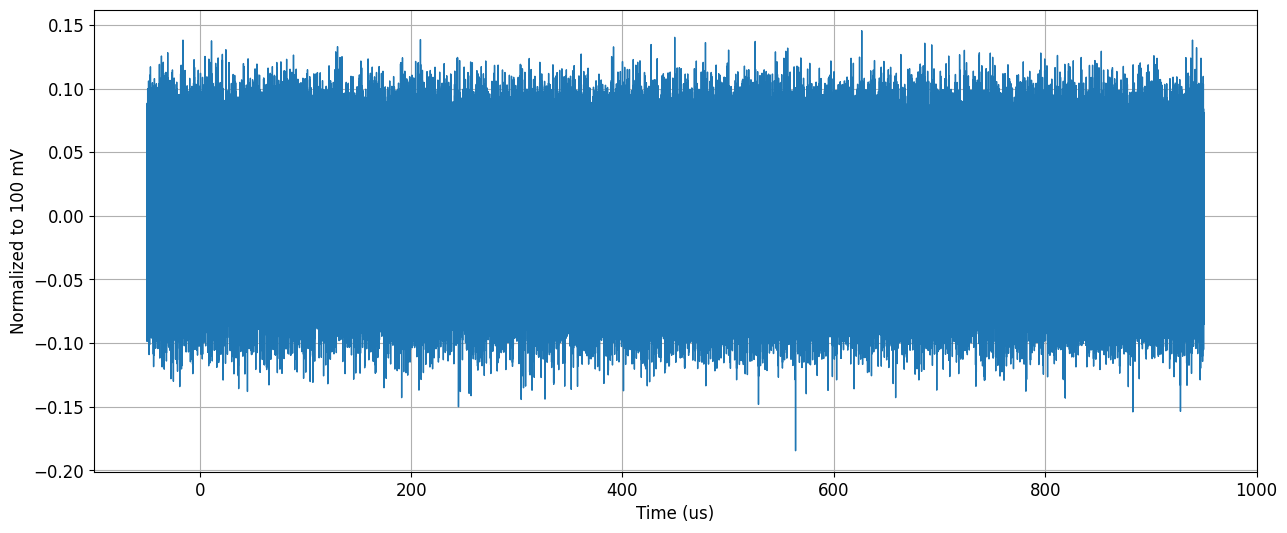

In [15]:
### Plot csv recordings
### of MSO64B channel 1

INFILE4 = "step3_RF_COMB_noise_ALL_ALL.csv"

time, chan1, chan2, chan3, chan4 = get_time_trace_data(INFILE4)
print(chan1[0], chan2[0], chan3[0], chan4[0])
print(chan1[1], chan2[1], chan3[1], chan4[1])

plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((time), chan1, "-", linewidth=1)
plt.ylabel("Normalized to 100 mV")
plt.xlabel("Time (us)")
plt.grid()
plt.show()

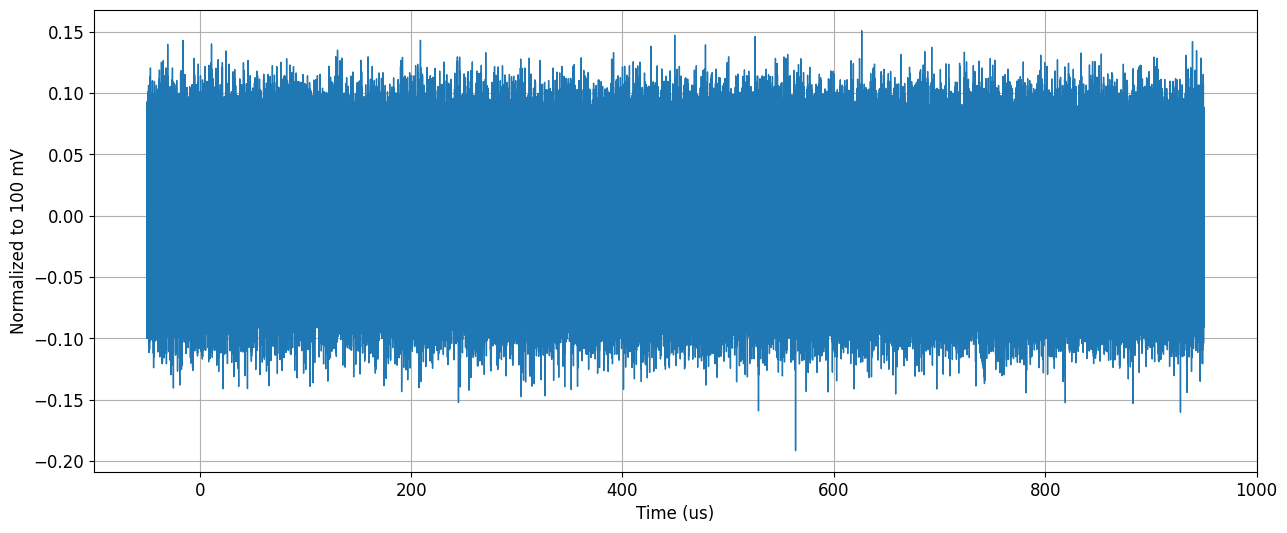

In [16]:
### Plot csv recordings
### of MSO64B channel 2

plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((time), chan2, "-", linewidth=1)
plt.ylabel("Normalized to 100 mV")
plt.xlabel("Time (us)")
plt.grid()
plt.show()

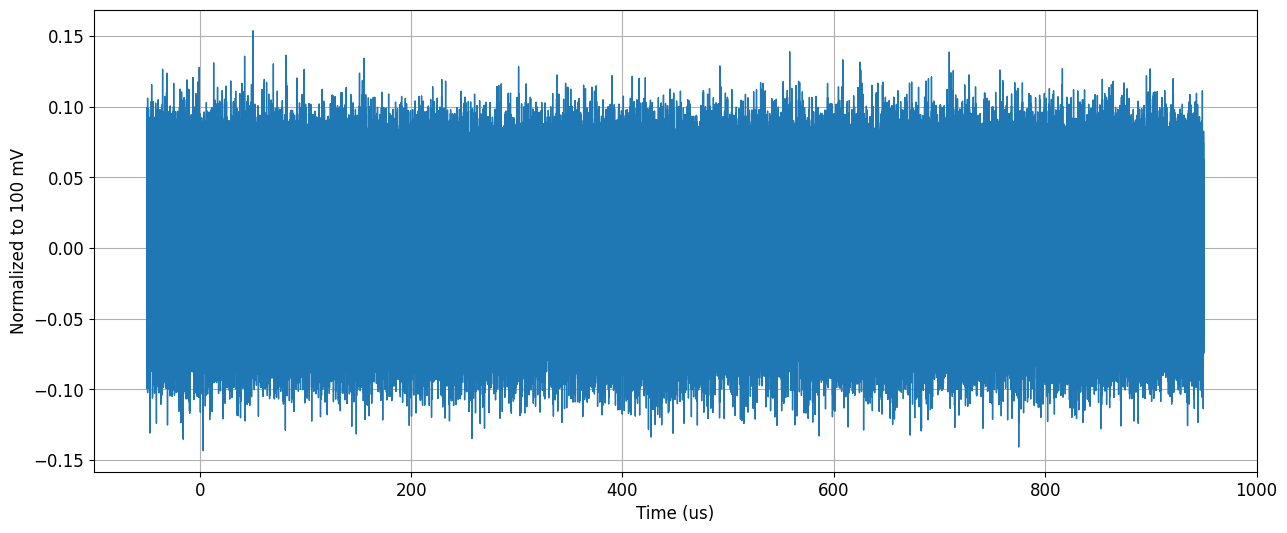

In [17]:
### Plot csv recordings
### of MSO64B channel 3

plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((time), chan3, "-", linewidth=1)
plt.ylabel("Normalized to 100 mV")
plt.xlabel("Time (us)")
plt.grid()
plt.show()

In [18]:
### Determine correlations using FFT
###

### Valid
### Autocorrelations
print(ss.correlate(chan1, chan1, mode="valid", method="fft"))
print(ss.correlate(chan2, chan2, mode="valid", method="fft"))
print(ss.correlate(chan3, chan3, mode="valid", method="fft"))
print(ss.correlate(chan4, chan4, mode="valid", method="fft"))

### Crosscorrelations
print(ss.correlate(chan1, chan2, mode="valid", method="fft"))
print(ss.correlate(chan1, chan3, mode="valid", method="fft"))
print(ss.correlate(chan1, chan4, mode="valid", method="fft"))
print(ss.correlate(chan2, chan3, mode="valid", method="fft"))
print(ss.correlate(chan2, chan4, mode="valid", method="fft"))
print(ss.correlate(chan3, chan4, mode="valid", method="fft"))

### Full
### Autocorrelations
print(ss.correlate(chan1, chan1, method="fft"))
print(ss.correlate(chan2, chan2, method="fft"))
print(ss.correlate(chan3, chan3, method="fft"))
print(ss.correlate(chan4, chan4, method="fft"))

### Crosscorrelations
print(ss.correlate(chan1, chan2, method="fft"))
print(ss.correlate(chan1, chan3, method="fft"))
print(ss.correlate(chan1, chan4, method="fft"))
print(ss.correlate(chan2, chan3, method="fft"))
print(ss.correlate(chan2, chan4, method="fft"))
print(ss.correlate(chan3, chan4, method="fft"))

[2598.6843]
[2733.9448]
[2301.1975]
[2284.176]
[2544.9739]
[387.31403]
[380.74585]
[417.2378]
[407.18506]
[2264.4797]
[ 2.560e-05 -1.408e-04 -5.632e-04 ... -5.504e-04 -1.536e-04  0.000e+00]
[ 2.3040001e-04 -1.9200001e-05 -1.2800000e-04 ... -1.4720000e-04
  2.5600000e-05  1.9200001e-04]
[ 3.840e-05 -6.144e-04 -3.200e-05 ... -7.680e-05 -6.208e-04  7.680e-05]
[-0.0001664 -0.0009216 -0.000512  ... -0.0005632 -0.0009344 -0.000128 ]
[-1.2800000e-04 -5.5679999e-04  4.0960000e-04 ... -1.2160001e-03
  3.8400001e-04  3.2000000e-05]
[-1.4720000e-04 -5.2479998e-04  3.0240000e-04 ... -1.4464001e-03
  2.5600000e-04  1.2800000e-05]
[-1.0080e-04 -5.1840e-04  2.2400e-04 ... -1.0368e-03 -2.0480e-04
  2.5600e-05]
[ 2.0480000e-04 -1.5680000e-04  8.4480003e-04 ... -7.4240001e-04
 -4.7360000e-04  7.6800003e-05]
[ 0.0001632 -0.0001152  0.0006    ... -0.0003456 -0.0009216 -0.0001408]
[ 0.0001216 -0.0005632 -0.0001664 ... -0.0004096 -0.000992  -0.0001024]


In [16]:
### The input power is required to be -110 dBm/MHz in the LOW band.
## Determine the initial value averaged over the band and then compute attenuation needed to be added.

## The LOW band frequency range
flow = 50.0
fhigh = 350.0

## Defines the index range over which to average
ilow = np.argmin(np.abs(freq - flow))
ihigh = np.argmin(np.abs(freq - fhigh))
print(
    "Average in index interval: ",
    ilow,
    ihigh,
    " for freq range: ",
    freq[ilow],
    freq[ihigh],
)

## Average the current SSG power at LNA input
Av_linear = ma.mean(PWpMHz_LNAinput1[ilow : ihigh + 1])  # average in W/MHz
## Correcting this for the noise power from the 40dB attenuator
Av_linearC = Av_linear - PWpMHz_Attenuator

## Required noise power is -110 dBm/MHz
Required_NoisePower_lin = (10.0 ** (-110.0 / 10.0)) * 1e-3  # W/MHz
## Required noise power corrected for that from 40dB attenuator:
Required_NoisePower_linC = Required_NoisePower_lin - PWpMHz_Attenuator

## Required attenuation is
Required_atten = 10.0 * np.log10(Av_linearC / Required_NoisePower_linC)

print(
    "Required attenuation to be added: ",
    Required_atten,
    " to get the LNA input power to -110 dBm/MHz.",
)

Average in index interval:  40 340  for freq range:  50.0 350.0
Required attenuation to be added:  6.7721135067495455  to get the LNA input power to -110 dBm/MHz.


In [17]:
### Attenuation added in the digital step attenuator may only be to nearest 0.25 dB

Atten_added = 6.75  # dB

In [29]:
### SA Power measurement of the SSG after adding the additional attenuator
###

INFILE5 = "SUT1 input 2 X VAT20 removed reference measurement SSG V2 6dB75 prog_att.csv"

freq, Pdbm0 = get_frequency_spectrum(INFILE5)

Pdbm_LNAinput2 = (
    Pdbm0 - avatten_40
)  ## dBm/MHz is the power of the noise source attenuated by 40 dB
PWpMHz_LNAinput2 = (10.0 ** (Pdbm_LNAinput2 / 10.0)) * 1e-3  # convert to W/MHz

PWpMHz_Attenuator = (
    Tatten * (1 - avatten_40_lin) * KB * 1e6
)  # W/MHz from the 40-dB attenuator

## Adding both
Pdbm_LNAinput3 = 10.0 * np.log10(
    (PWpMHz_LNAinput2 + PWpMHz_Attenuator) * 1e3
)  # converted to dBm/MHz
PWpMHz_LNAinput3 = (10.0 ** (Pdbm_LNAinput3 / 10.0)) * 1e-3  # convert to W/MHz

Tin = (PWpMHz_LNAinput3) / (KB * 1e6)  # kelvin

plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((freq), Tin, "-", linewidth=1)
plt.ylabel("SSG Noise Temperature (K)")
plt.xlabel("Freq (MHz)")
plt.grid()
plt.show()

Change in output power level with SSG is switched off is:  3.2373147  dB


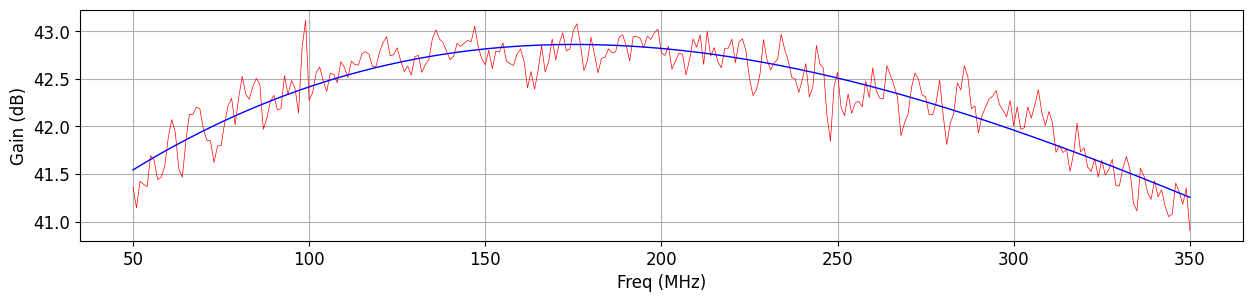

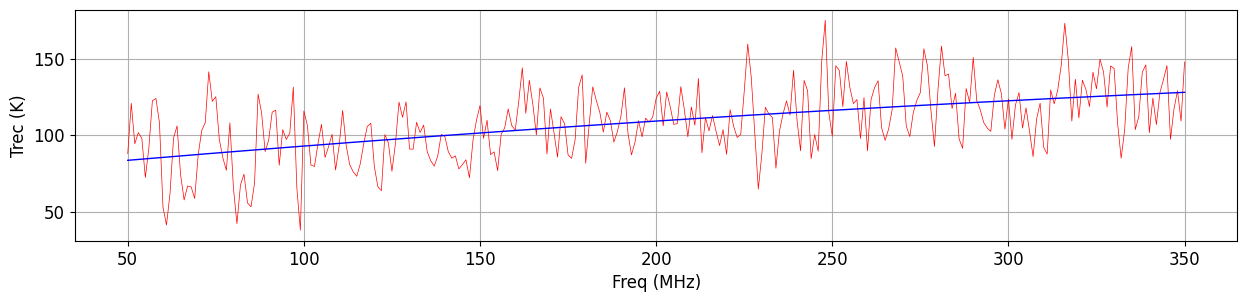

In [28]:
### With SSG connectred to LNA input,
### SA Power measurement is now made at output of the LNA+RF cable assembly

## With SSG ON:
INFILE6 = "SUT1 CAMT5386 Noise on SSG V2.csv"
freq, Pdbm1 = get_frequency_spectrum(INFILE6)
TON = ((10.0 ** (Pdbm1 / 10.0)) * 1e-3) / (KB * 1e6)

## With SSG OFF
INFILE7 = "SUT1 CAMT5386 Noise off SSG V2.csv"
freq, Pdbm0 = get_frequency_spectrum(INFILE7)
TOFF = ((10.0 ** (Pdbm0 / 10.0)) * 1e-3) / (KB * 1e6)

### With noise source and associated amplifier off, the SSG is now with noise temperature
Tin0 = Tatten

freq_LOW = freq[ilow : ihigh + 1]
Pdbm1_LOW = Pdbm1[ilow : ihigh + 1]
Pdbm0_LOW = Pdbm0[ilow : ihigh + 1]

### Examine the change in dB when Noise is switched OFF:
print(
    "Change in output power level with SSG is switched off is: ",
    np.mean(Pdbm1_LOW - Pdbm0_LOW),
    " dB",
)

### And as a plot
plt.figure(figsize=[15, 6])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((freq_LOW), Pdbm0_LOW, "r-", linewidth=1.0, label="Noise Source OFF")
ax1.plot((freq_LOW), Pdbm1_LOW, "b-", linewidth=1.0, label="Noise Source ON")
plt.ylabel("Power at end of RF cable (dBm)")
plt.xlabel("Freq (MHz)")
plt.legend(loc="best")
plt.grid()
plt.show()


### Compute Assembly Gain and Noise Temperature
Gain_LOW = np.divide(
    (TON[ilow : ihigh + 1] - TOFF[ilow : ihigh + 1]),
    (Tin[ilow : ihigh + 1] - Tin0),
)
Trec_LOW = np.divide(TON[ilow : ihigh + 1], Gain_LOW) - Tin[ilow : ihigh + 1]

### And plot the gain and assembly noise temperature
### With low-order polynomial fits overlaid
###

plt.figure(figsize=[15, 3])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((freq_LOW), 10.0 * np.log10(Gain_LOW), "r-", linewidth=0.5)
norder = 3
zz = np.polyfit(freq_LOW, 10.0 * np.log10(Gain_LOW), norder)
ax1.plot((freq_LOW), func_poly(zz, freq_LOW), "b-", linewidth=1)
plt.ylabel("Gain (dB)")
plt.xlabel("Freq (MHz)")
plt.grid()
plt.show()

plt.figure(figsize=[15, 3])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)
ax1.plot((freq_LOW), (Trec_LOW), "r-", linewidth=0.5)
norder = 2
zz = np.polyfit(freq_LOW, (Trec_LOW), norder)
ax1.plot((freq_LOW), func_poly(zz, freq_LOW), "b-", linewidth=1)
plt.ylabel("Trec (K)")
plt.xlabel("Freq (MHz)")
plt.grid()
plt.show()